In [1]:
import pyvo
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import ks_2samp

LUego de instalar el paquete, seleccionamos la base de datos del The Extrasolar Planets Encyclopaedia (http://exoplanet.eu/)

In [2]:
service = pyvo.dal.TAPService("http://voparis-tap-planeto.obspm.fr/tap")

Pedimos la listas de planetas con masa, radio, período orbital, tipo de detección, semieje mayor y  tipo espetral con un query 

In [3]:
query="SELECT mass,radius,period,detection_type,semi_major_axis,star_spec_type FROM exoplanet.epn_core" 

Para acceder a los resultados del query en una tabla que llamaremos results, escribimos lo siguiente

In [4]:
results = service.search(query) 

Pedimos que nos guarde estos datos en una tabla numpy

In [5]:
np.save('myresults',results.to_table())

Ahora accedemos a la tabla que guardamos

In [6]:
results=np.load('myresults.npy', allow_pickle=True)

 ### Inciso a
 
Debemos estudiar la distribución de índices de masas y períodos orbitales para planetas descubiertos con diferentes técnicas observacionales y analizar los resultados para determinar si existe un sesgo en las propiedades de los exoplanetas en función del tipo de técnica utilizada.

Para empezar sustraemos los datos de masas, períodos y tipo de detección de la tabla.

In [7]:
masas = []
periodos = []
deteccion = []

for i in range (len(results)):
    a = results[i][0]
    b = results[i][2]
    c = results[i][3]
    if a == a and b == b:
        masas.append(np.log10(a))
        periodos.append(np.log10(b))
        deteccion.append(c)
        
        #print(results[i][0],results[i][2])

In [8]:
set(deteccion)

{b'Astrometry',
 b'Imaging',
 b'Microlensing',
 b'Other',
 b'Primary Transit',
 b'Primary Transit#TTV',
 b'Pulsar',
 b'Radial Velocity',
 b'TTV'}

In [9]:
list(set(deteccion))

[b'Other',
 b'Pulsar',
 b'Imaging',
 b'Primary Transit#TTV',
 b'Primary Transit',
 b'Astrometry',
 b'Radial Velocity',
 b'Microlensing',
 b'TTV']

In [10]:
list(set(deteccion))[3]

b'Primary Transit#TTV'

Armamos una lista donde ordenamos los métodos de forma distinta para que los resultados en el gráfico se puedan ver mejor.

In [11]:
lista = [list(set(deteccion))[8],list(set(deteccion))[7],list(set(deteccion))[4],list(set(deteccion))[0],list(set(deteccion))[2],list(set(deteccion))[6],list(set(deteccion))[3],list(set(deteccion))[5],list(set(deteccion))[1]]

In [12]:
lista

[b'TTV',
 b'Microlensing',
 b'Primary Transit',
 b'Other',
 b'Imaging',
 b'Radial Velocity',
 b'Primary Transit#TTV',
 b'Astrometry',
 b'Pulsar']

Construimos una función para utilizarla para hacer el gráfico. Utilizamos el comando $.decode('utf-8')$ para decodificar los elementos de la lista de los métodos de detección.

No handles with labels found to put in legend.


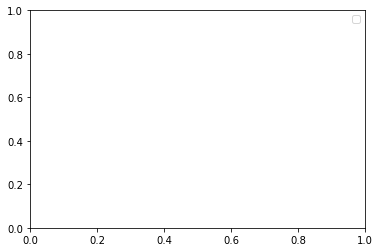

In [13]:
def g(RV,color1):
    l = 0
    p1 = 6
    for k in deteccion:
        if k == RV:

            if p1==6:
                plt.scatter(masas[l],periodos[l],c=color1,label= k.decode('utf-8'))
                p1 = 1
                continue
            if p1 == 1:
                plt.scatter(masas[l],periodos[l],c=color1)

        else:
            continue
        l = l + 1

plt.legend()
plt.show()  

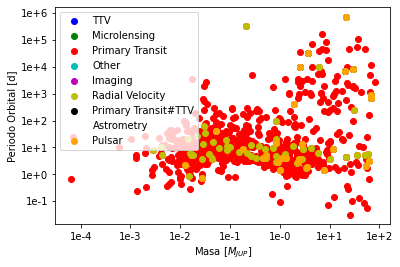

In [14]:
color = ['b','g','r','c','m','y','k','w','orange']
v = 0
for h in lista:
    g(h,color[v])
    v = v + 1
plt.xticks([-4,-3,-2,-1,0,1,2],['1e-4','1e-3','1e-2','1e-1','1e-0','1e+1','1e+2'])
plt.yticks([-1,0,1,2,3,4,5,6],['1e-1','1e+0','1e+1','1e+2','1e+3','1e+4','1e+5','1e+6'])
plt.xlabel('Masa [$M_{JUP}$]')
plt.ylabel('Periodo Orbital [d]')
plt.legend()
plt.show()

### Inciso b

En este inciso debemos estudiar la distribución de los semiejes de los exoplanetas y determinar si la misma es consistente con una distribución gaussiana.

Primero armamos una lista con los semiejes sin contener los 'nan'

In [15]:
semieje = []
for q in range(len(results)):
    d = a = results[q][4]
    if d == d:
        semieje.append(np.log10(d))

Text(0.5, 0, 'Semieje [UA]')

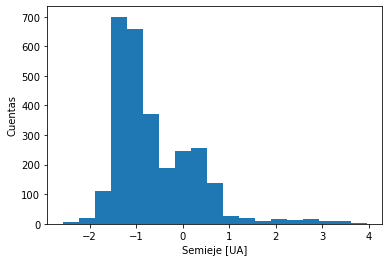

In [16]:
a = plt.hist(semieje, bins = 19)
#plt.xticks([-2,-1,0,1,2,3,4],['1e-2','1e-1','1e+0','1e+1','1e+2','1e+3','1e+4'])
plt.ylabel('Cuentas')
plt.xlabel('Semieje [UA]')

Vemos cuales son límites de los bines del histograma

In [17]:
a[1]

array([-2.58004425, -2.23563204, -1.89121982, -1.54680761, -1.20239539,
       -0.85798318, -0.51357096, -0.16915875,  0.17525347,  0.51966568,
        0.8640779 ,  1.20849011,  1.55290232,  1.89731454,  2.24172675,
        2.58613897,  2.93055118,  3.2749634 ,  3.61937561,  3.96378783])

Para generar la muestra de variables normales, usamos como parámetros la media y la desviación estandar del histograma

In [18]:
mean = np.mean(semieje)
std = np.std(semieje)

In [19]:
v_norm = []
for i in range(len(a[1])):
    x = norm.pdf(a[1][i], loc=mean, scale=std)
    v_norm.append(x)

In [20]:
ancho = a[1][0]-a[1][1]
xlista = [a[1][i] for i in range(len(a[1])-1)]
f = [a[0][i]/len(semieje) for i in range(len(a[0]))]

In [21]:
print(len(f),len(xlista))

19 19


Text(0, 0.5, 'Frecuencias')

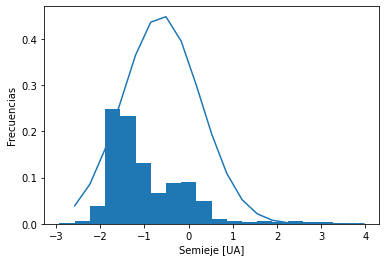

In [22]:
plt.bar(xlista,f,width=ancho,align='edge')
plt.plot(a[1],v_norm)
plt.xlabel('Semieje [UA]')
plt.ylabel('Frecuencias')

Como consideramos que la variable semieje proviene de una distribución continua entonces para compararla con una normal debemos usar el KS test.
Consideraremos como hipótesis nula

<center>
$H_0$ : ambas muestras provienen de la misma distribución
</center>

y como hipótesis alternativa

<center>
$H_i$ : ambas muestras provienen de distribuciones distintas
</center>

Como estadístico de prueba utilizaremos 

<center>
$D_{m,n}^{obs} = sup_x |F_{1,n} - F_{1,m}|$
</center>

donde $n$ y $m$ son los tamaños de las muestras, $F_{1,n}$ y $F_{1,m}$ son las funciones distribución empíricas, y rechazaremos la hipótesis nula cuando 

$ $

<center>
$D_{m,n}^{obs} > D_{max}^{\alpha}$ 
</center>

De este modo, si elegimos un nivel de significancia del 95% y teniendo $\nu$ = 18 (https://www.statisticshowto.com/kolmogorov-smirnov-test/#pvalue), tenemos que $D_{max}^{\alpha} = 0.309$.
Procedemos a calcular $D_{m,n}^{obs}$ usando la función $kstest$ del paquete $scipy$ 

In [23]:
ks_2samp(f, v_norm)

KstestResult(statistic=0.3, pvalue=0.24244968766417718)

Vemos que el KS test nos devuelve un $D_{m,n}^{obs}$ = 0.3, lo que hace que  tengamos que rechazarla hipótesis nula, y por lo tanto ambas muestras provienen de distribuciones distintas.

### Inciso c

En este inscico debemos realizar un gráfico de las masas y los radios de los planetas y luego proponer un modelo, realizar un ajuste de ese modelo y al final discutir el procedimiento para el ajuste del modelo.

Para empezar creamos listas con los elementos pedidos, de tal forma que tengan la misma cantidad.

In [24]:
radios = []
masas2 = []

for i in range (len(results)):
    r = results[i][1]
    m2 = results[i][0]
    if r == r and m2 == m2:
        radios.append(np.log10(r))
        masas2.append(np.log10(m2))

In [25]:
print(len(masas2),len(radios))

944 944


Hacemos un gráfico primeriso para ver como se distribuyen los puntos

Text(0, 0.5, '$Log_{10}$(radio) [$R_J$]')

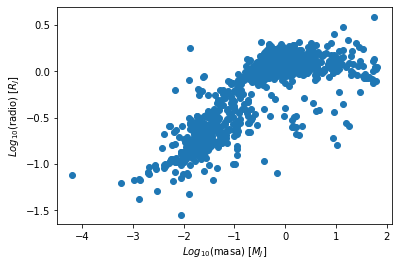

In [51]:
plt.scatter(masas2,radios)
plt.xlabel('$Log_{10}$(masa) [$M_J$]')
plt.ylabel('$Log_{10}$(radio) [$R_J$]')

A primera vista es facil identificar dos tipos de ''bollos'', uno arriba centrado a la derecha y otro abajo centrado más a la izquierda. 

Ajustaremos estos datos a un modelo de gaussianas usando la función $GaussianMixture$ del paquete $sklearn$.

Comenzamos convirtiendo nuestras listas de datos a una matriz AxB, donde A sea el número de elementos (en nuestro caso, número de planetas) y B sea el número de características (en nuestro caso, radio y masa), o sea que será una matriz 994x2

In [27]:
m = np.array(masas2)
n = np.array(radios)

In [28]:
M = np.zeros([len(m),2])

In [29]:
M

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [30]:
M[:,0]=m

In [31]:
M[:,1]=n

In [37]:
M

array([[ 1.14612804,  0.23044892],
       [ 1.30103   ,  0.        ],
       [ 1.1430148 ,  0.15836249],
       ...,
       [ 1.11394335,  0.07918125],
       [-1.81901442, -0.7767897 ],
       [ 0.76641285,  0.02530587]])

Ahora le importo el paquete y definimos, con un parámetro que llamaremos $gmm$, el creador de las gaussianas. 

In [33]:
from sklearn import mixture

In [46]:
gmm = mixture.GaussianMixture(n_components=2)

In [53]:
#help(gmm)

Ahora estimamos los parámetros de nuestras gaussianas (2 en total por lo dicho al principio) y con la tarea $predict$ creamos las etiquetas para cada punto de nuestro gráfico (la tarea dirá que puntos pertenecen a un modelo de gaussiana y cuales al otro)

In [48]:
gmm.fit(M)

GaussianMixture(n_components=2)

In [49]:
etiquetas = gmm.predict(M)

Text(0, 0.5, '$Log_{10}$(radio) [$R_J$]')

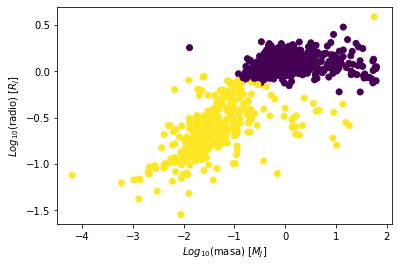

In [50]:
plt.scatter(masas2,radios,c=etiquetas)
plt.xlabel('$Log_{10}$(masa) [$M_J$]')
plt.ylabel('$Log_{10}$(radio) [$R_J$]')

Ahora estudiamos la cantidad de gaussianas que pueden ajustar nuestros datos, y para esto utilizaremos dos criterios: el criterio de información de Aikaki (AIC) y el Bayesiano (BIC). Propondremos analizar modelos que van de 2 a 10 gaussianas.

In [54]:
for i in range(2,10):
    gmm = mixture.GaussianMixture(n_components=i)
    gmm.fit(M)
    A = gmm.aic(M)
    B=gmm.bic(M)

    print(A,B)

1912.3051565459934 1965.656544373594
1651.1912817589564 1733.6434265834298
1600.8869768161283 1712.4398786374747
1584.903271841014 1725.5569306592336
1553.4621084331106 1723.216524248203
1522.427197138201 1721.2823699501666
1520.1179704838908 1748.0739002927294
1511.5504677606873 1768.6071545663988


Según el criterio de Aikaki, 8 gaussianas hacen un mejor ajuste de los datos y según el Bayesiano, 7 gaussianas.

In [55]:
gmm = mixture.GaussianMixture(n_components=7)
gmm.fit(M)
etiquetas = gmm.predict(M)

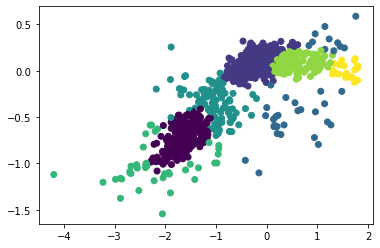

In [56]:
plt.scatter(masas2,radios,c=etiquetas)

Aunque el modelo predice que para tal cantidad de gaussianas el ajuste es mejor, debemos pensar si tiene sentido físico que sea lo mejor para nuestros datos. Hasta ahora no hemos encontrado alguna justificación que nos habilite a pensar algo así, por lo que decidimos que un ajuste de 2 gaussianas sería el apropiado.